In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

In [7]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.describe()

,DUQ_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000,119076.000000
mean,1658.792733,2011.303193,6.417028,15.720531,2.475310,179.862743,26.124332,2.999505,11.500890,0.027008,0.027008,0.027201
std,301.751471,3.926493,3.436460,8.801379,1.113754,105.056765,15.007716,2.000044,6.921991,0.162107,0.162107,0.162670
min,1014.000000,2005.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1444.000000,2008.000000,3.000000,8.000000,1.000000,89.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,1630.000000,2011.000000,6.000000,16.000000,2.000000,178.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,1819.000000,2015.000000,9.000000,23.000000,3.000000,270.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,3054.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


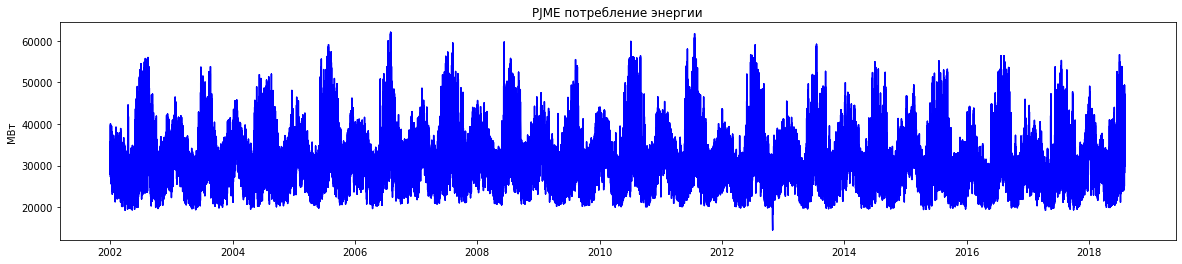

In [9]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJME потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

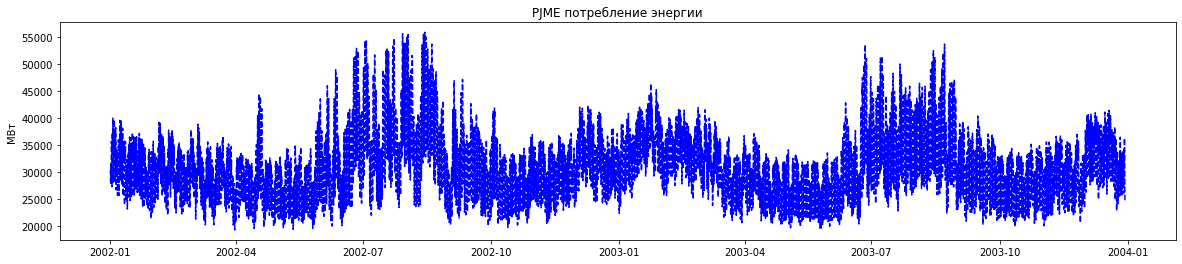

In [12]:
date_time =data['PJME_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJME потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [13]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [14]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 't')

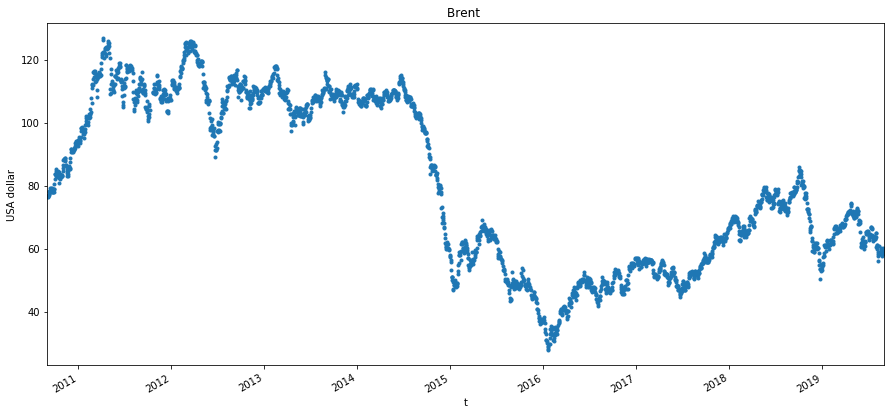

In [15]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [16]:
data_m = data.resample('M').mean()
brent_data_m = brent_data.resample('M').mean()

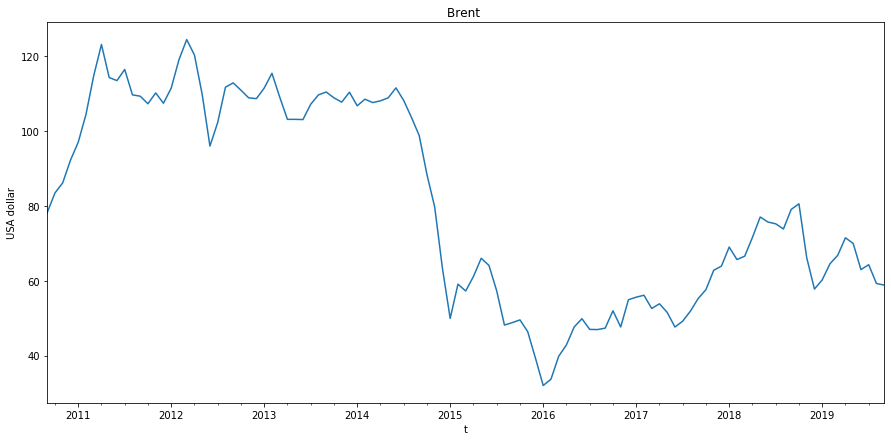

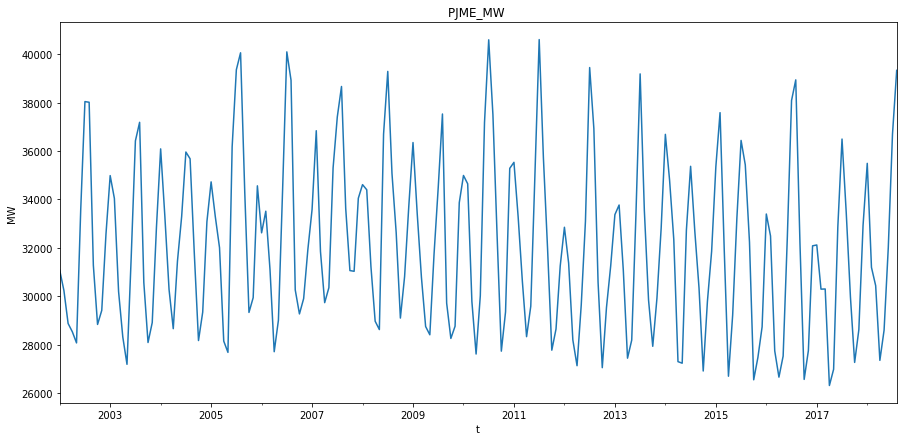

In [17]:
_ = brent_data_m['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.show()

_ = data_m['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [18]:
data_y = data.resample('Y').mean()
brent_data_y = brent_data.resample('Y').mean()

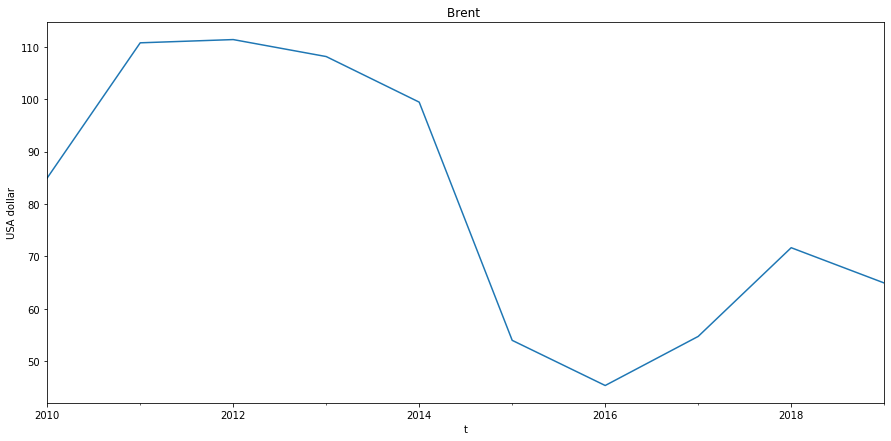

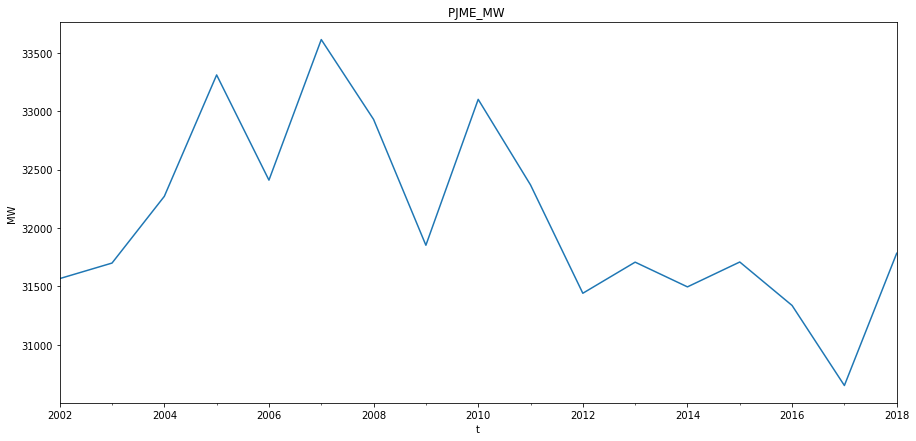

In [19]:
_ = brent_data_y['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.show()

_ = data_y['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [20]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]

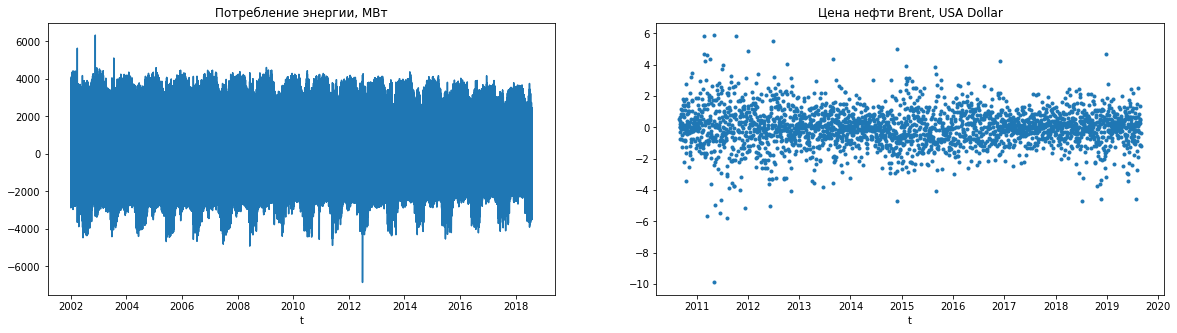

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(data.iloc[:-1].index,d_data)
plt.xlabel('t')
plt.title('Потребление энергии, МВт')
plt.subplot(1,2,2)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.')
plt.xlabel('t')
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

In [22]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


In [23]:
DF_data = sm.tsa.stattools.adfuller(data_m['PJME_MW'].values,regression='ctt')
DF_data

(-2.577455591729167,
 0.524786009367929,
 15,
 184,
 {'1%': -4.435220952056536,
  '5%': -3.86487409876613,
  '10%': -3.5733156719443473},
 3230.9060995689206)

In [24]:
DF_brent = sm.tsa.stattools.adfuller(brent_data['Значение'].values, regression = 'ctt')
DF_brent

(-2.682214495590098,
 0.46445466836789234,
 1,
 2665,
 {'1%': -4.375483353680849,
  '5%': -3.8346077873672324,
  '10%': -3.554633956872604},
 8609.945844623533)

In [25]:
DF_data_d = sm.tsa.stattools.adfuller(d_data,regression='ctt')
DF_data_db = sm.tsa.stattools.adfuller(d_brent_data,regression='ctt')
print('коэффициент ADF для 1-й разности потребления энергии: ', DF_data_d[1])
print('коэффициент ADF для 1-й разности для цены нефти: ', DF_data_db[1])

коэффициент ADF для 1-й разности потребления энергии:  0.0
коэффициент ADF для 1-й разности для цены нефти:  0.0


In [26]:
b_ar = brent_data['Значение'].values
b_s = pd.DataFrame(data = brent_data[['Значение']])

In [27]:
b_s.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


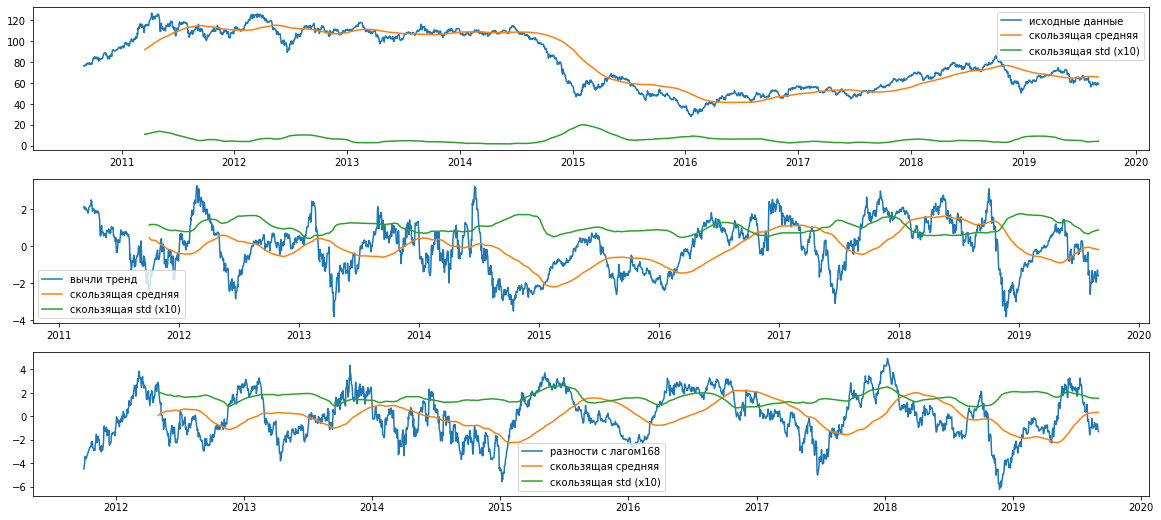

In [28]:
#import matplotlib.dates as mdates
train = b_s.iloc[:-10, :]
test = b_s.iloc[-10:, :]


N2 = 24*7

b_s['z_data'] = (b_s['Значение'] - b_s['Значение'].rolling(window=N2).mean()) / b_s['Значение'].rolling(window=N2).std()
b_s['zp_data'] = b_s['z_data'] - b_s['z_data'].shift(N2)

def plot_rolling(b_s):
    fig, ax = plt.subplots(3,figsize=(20, 9))
    ax[0].plot(b_s.index, b_s['Значение'], label='исходные данные')
    ax[0].plot(b_s['Значение'].rolling(window=N2).mean(), label="скользящая средняя");
    ax[0].plot(b_s['Значение'].rolling(window=N2).std(), label="скользящая std (x10)");
    ax[0].legend()

    ax[1].plot(b_s.index,b_s.z_data, label="вычли тренд")
    ax[1].plot(b_s.z_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[1].plot(b_s.z_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[1].legend()

    ax[2].plot(b_s.index, b_s.zp_data, label="разности с лагом" +str(N2))
    ax[2].plot(b_s.zp_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[2].plot(b_s.zp_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[2].legend()

    #plt.tight_layout()
   #
    plt.show()
plot_rolling(b_s)    

Text(0.5, 1.0, 'Brent 2010-2019')

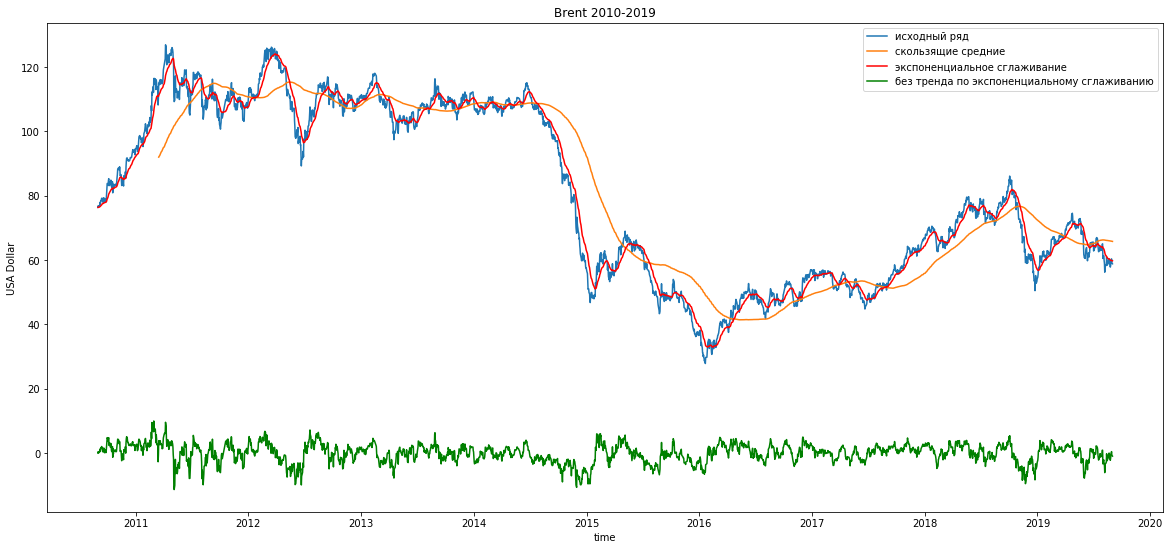

In [29]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

b_ar_exp_1 = exponential_smoothing(brent_data['Значение'], 0.08)

plt.figure(figsize=(20, 9))
plt.plot(b_s.index, b_s['Значение'], label='исходный ряд')
plt.plot(b_s['Значение'].rolling(window=N2).mean(), label="скользящие средние");

plt.plot(b_s.index,b_ar_exp_1, color = 'red', label="экспоненциальное сглаживание");
plt.plot(b_s.index,b_s['Значение'] - b_ar_exp_1, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.xlabel('time')
plt.ylabel('USA Dollar')
plt.legend()
plt.title('Brent 2010-2019')


In [30]:
b_ar_exp_1 = pd.DataFrame(data = b_ar_exp_1, index = b_s.index)
#без тренда 
brent_data_trend_free = (b_s['Значение'] - b_ar_exp_1.iloc[:,0])
brent_data_trend_free.head()
DF_brent = sm.tsa.stattools.adfuller(brent_data_trend_free , regression = 'ctt')
DF_brent

(-9.845273274342826,
 1.0640955784767778e-14,
 1,
 2665,
 {'1%': -4.375483353680849,
  '5%': -3.8346077873672324,
  '10%': -3.554633956872604},
 8175.837532020315)

In [60]:
# b_s.index

In [54]:
d_data=data.resample('D').mean()
d_data

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0
2002-01-06,30323.583333,2002.0,1.0,6.0,1.0,6.0,1.0,6.0,11.5,0.0,0.0,0.0
2002-01-07,33333.833333,2002.0,1.0,7.0,1.0,7.0,2.0,0.0,11.5,0.0,0.0,0.0
2002-01-08,34362.916667,2002.0,1.0,8.0,1.0,8.0,2.0,1.0,11.5,0.0,0.0,0.0
2002-01-09,33776.166667,2002.0,1.0,9.0,1.0,9.0,2.0,2.0,11.5,0.0,0.0,0.0


Text(0.5, 1.0, 'PJME_MW')

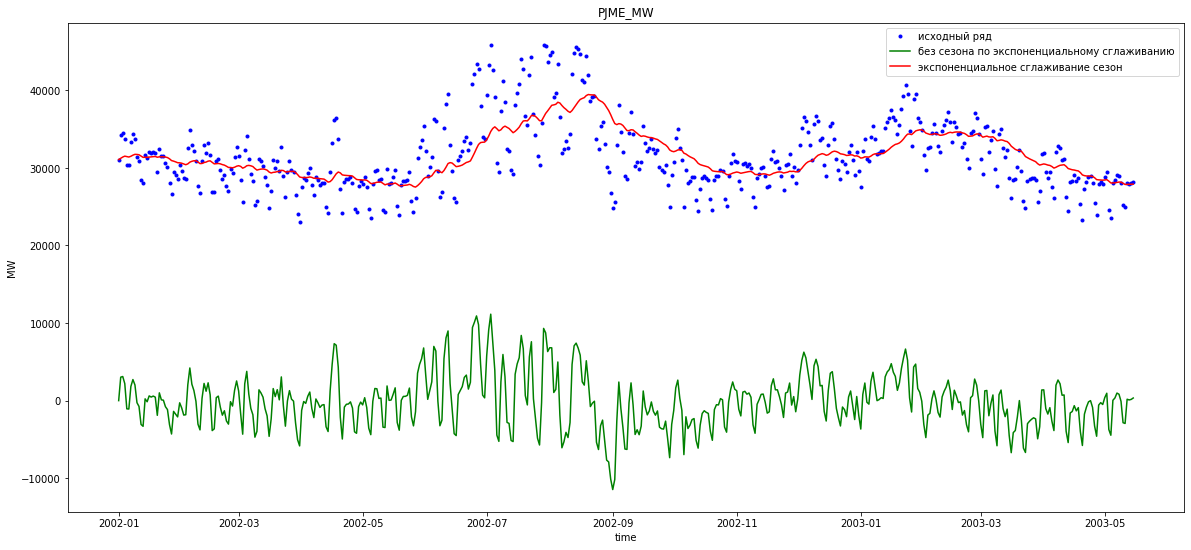

In [32]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [33]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.365362138573406,
 4.2829746151187824e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

In [58]:
# b_ar_exp_1

In [36]:
df= pd.DataFrame(b_ar_exp_1)
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]


df.head()

/home/belfigor/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Дата,,,,,,,,
2010-09-01,76.370000,0.000000,0.000000,0.0000,76.370000,76.370000,76.370000,0.0
2010-09-02,76.411600,76.370000,0.000000,0.0000,76.370416,76.371248,76.373328,0.0
2010-09-03,76.424272,76.411600,76.370000,0.0000,76.370955,76.372839,76.377404,0.0
2010-09-04,76.439930,76.424272,76.411600,76.3700,76.371644,76.374851,76.382406,0.0
2010-09-05,76.455136,76.439930,76.424272,76.4116,76.372479,76.377260,76.388224,0.0


In [37]:
df.columns

Index([0, 't', 't1', 't2', 'exp_0_01', 'exp_0_03', 'exp_0_08', 'diff1'], dtype='object')

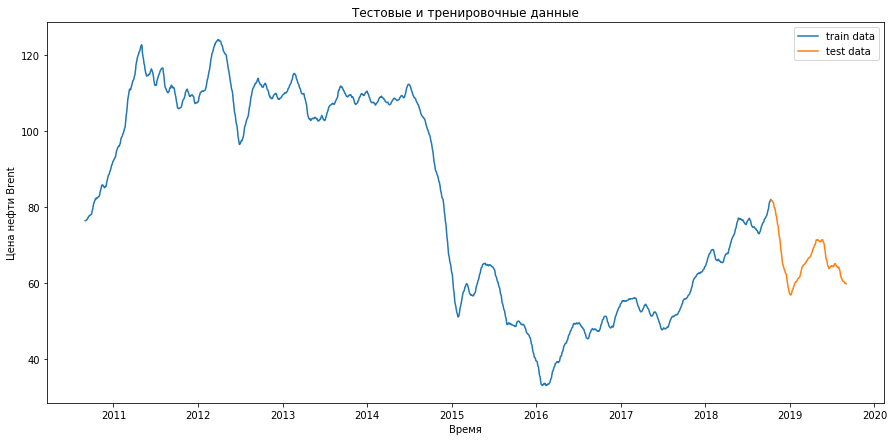

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

train_b, test_b = split_data_b( df, '10-10-2018')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цена нефти Brent')
plt.plot(train_b.index.get_level_values('Дата'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Дата'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

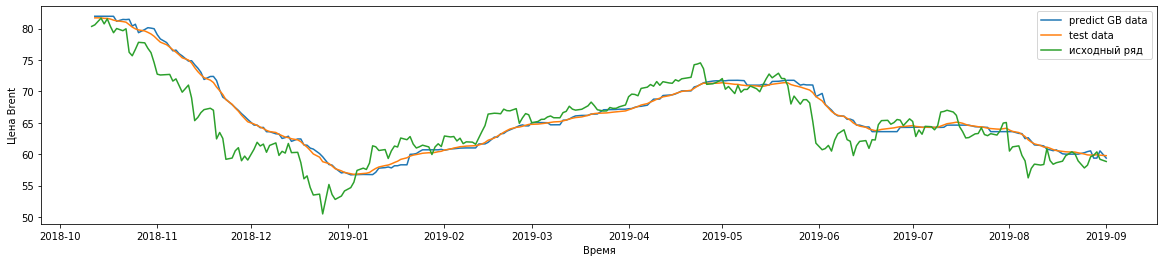

ошибка градиентного бустинга :   0.4420925885712683 %


In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-10-11':].index, b_s.loc['2018-10-11':]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

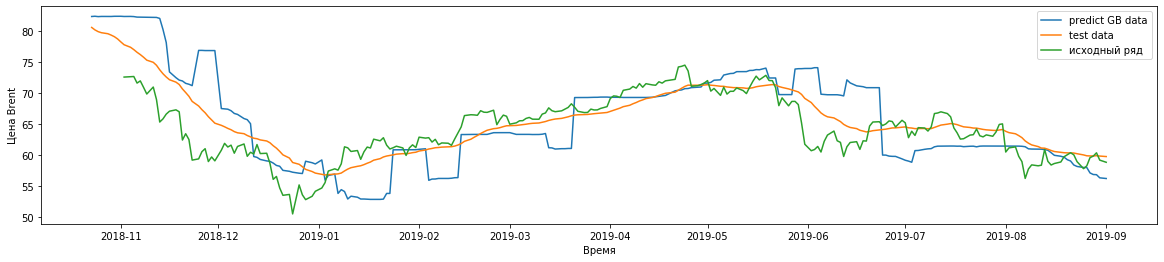

ошибка градиентного бустинга :   4.569012142938524 %


In [40]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-11-02':].index, b_s.loc['2018-11-02':]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


# ДЗ

## Сглаживание

In [62]:
# d_data #Сглаженная ранее PJME

In [51]:
d_data=data.resample('D').mean()

In [63]:
df= pd.DataFrame(data=data_exp_1, index=d_data.index)
# (data = b_ar_exp_1, index = b_s.index)
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]




In [64]:
df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,0.0
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,0.0
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,0.0
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,0.0


In [45]:
df.columns

Index([0, 't', 't1', 't2', 'exp_0_01', 'exp_0_03', 'exp_0_08', 'diff1'], dtype='object')

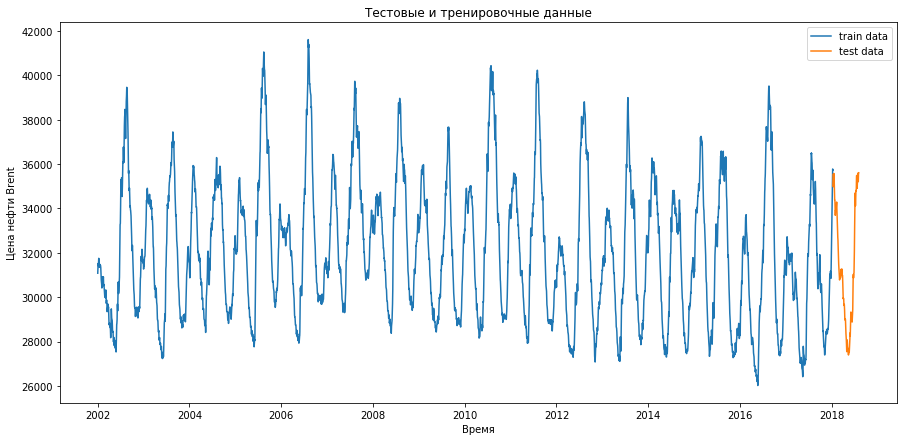

In [80]:
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_b, test_b = split_data_b(df, '01-10-2018')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цена нефти Brent')
plt.plot(train_b.index.get_level_values('Date'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

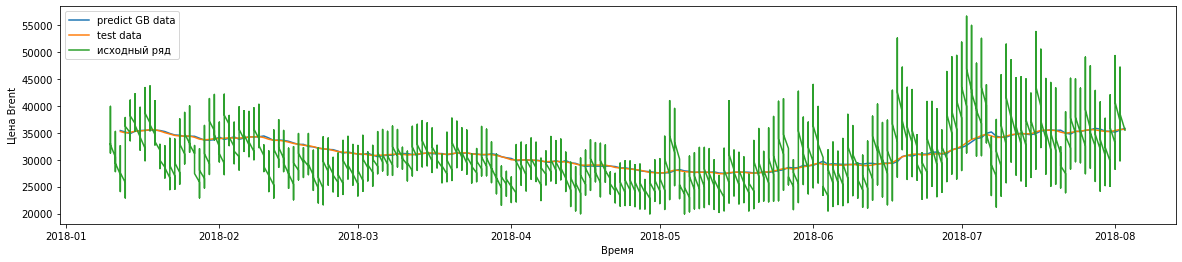

ошибка градиентного бустинга :   0.4213291721730003 %


In [86]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(data.loc['2018-01-10':'2018-08-11'].index, data.loc['2018-01-10':'2018-08-11']['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

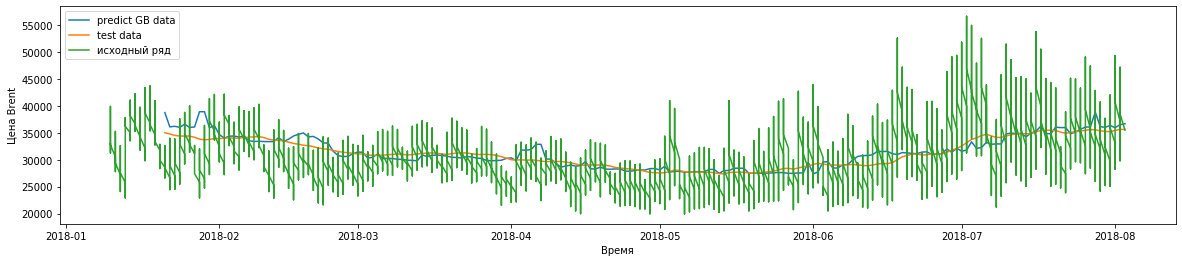

ошибка градиентного бустинга :   2.6698114838059395 %


In [91]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(data.loc['2018-01-10':'2018-08-11'].index, data.loc['2018-01-10':'2018-08-11']['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


In [89]:
data

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0
2002-01-01,06:00:00,28654.0,2002,1,1,1,1,1,1,6,1,0,0
2002-01-01,07:00:00,29308.0,2002,1,1,1,1,1,1,7,1,0,0
2002-01-01,08:00:00,29595.0,2002,1,1,1,1,1,1,8,1,0,0
2002-01-01,09:00:00,29943.0,2002,1,1,1,1,1,1,9,1,0,0


С увеличением h, ошибка растёт

    а) Изменение температуры за окном :).
Изменение температуры - не стационарный ряд т.к. несмотря на наличие цикличности, в один и тот же момент времени в разные года и десятилетия, температура будет отличаться    

    б) Количество денег, которые тратят покупатели в интернет магазине.
Ряд так же не стационарный, хотя он имеет некую сезонность привязанную к праздничным дням и отпускам
    
    в) Вес растущего котенка.
Тренжовый ряд, время идёт - котёнок жиреет. Но наверное в определённый момент, когда он перестанет расти, ряд станет стационарным
    
    г) Прирост объема деревьев в лесу от времени
Строго трендовый ряд т.к. в случае отсутствия постороннего вмешательства (пожары, вырубки, мясные человеки), лес будет разростаться до тех пор пока не займёт всю площадь или же не столкнётся с какими-либо другими непреодолимыми\экологическими факторами
